In [1]:
def aug(np_img ,crop_img_row , crop_img_col , label):
    """
    np_img must 4D 
    np_img shape : n , row , col , color_ch
    
    """
    n_img,img_row,img_col,color_ch=np.shape(np_img)
    n_ret_img = n_img*(img_row - crop_img_row) * (img_col - crop_img_col)*2
    ret_images = np.zeros([n_ret_img ,crop_img_row , crop_img_col,color_ch])
    len_label= np.shape(label)[1]
    ret_labels =  np.zeros([n_ret_img  ,len_label])
    #print "n_augmented image size : " , n_ret_img 
    #print "n classes :", len_label
    #copy label in factor by 2014
    count=0
    if len(np.shape(np_img))==2:
        np_img=np.reshape(np_img , newshape = [np.shape(np_img)[0] , img_row , img_col ,color_ch])
        print np.shape(np_img)
    for n  in range(0,n_img):
        for r in range(img_row - crop_img_row):
            for c in range(img_col - crop_img_col):
                cropped_img = np_img[n, r:crop_img_row +r , c:crop_img_col+c ,: ]
                ret_images[count*2,:,:,:]=cropped_img  
                ret_images[(count*2+1) , :,:,:] =np.fliplr(cropped_img )
                ret_labels[count*2 , : ] = label[n,:]
                ret_labels[count*2+1 , : ] = label[n,:]
                count+=1
    return ret_images ,ret_labels



In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
file_locate='/home/user01/notebook/eye_numpy_64/'
test_img=np.load(file_locate+'test_img.npy');
test_lab=np.load(file_locate+'test_lab.npy');

(1568, 100, 100, 3)
[ 0.  1.]


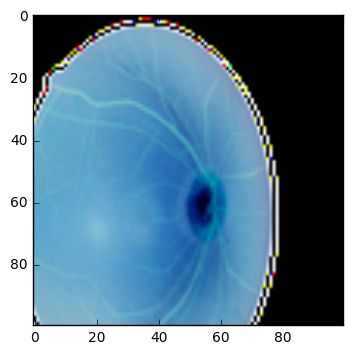

In [16]:
aug_imgs,aug_labs=aug(test_img[0:1] , 100 ,100 , test_lab[0:1])

print np.shape(aug_imgs)
plt.imshow(aug_imgs[1])
print aug_labs[1]

(1568, 100, 100, 3)
[ 0.  1.]


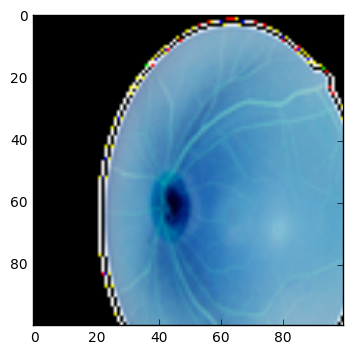

In [21]:


print np.shape(aug_imgs)
plt.imshow(aug_imgs[0])
print aug_labs[0]

[ 0.  1.]


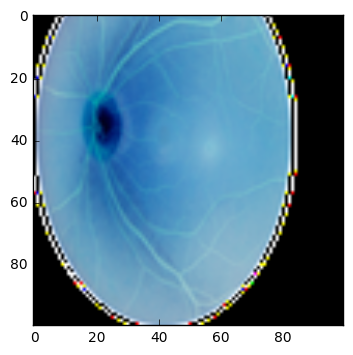

In [23]:
plt.imshow(aug_imgs[1500])
print aug_labs[1500]

[ 0.  1.]


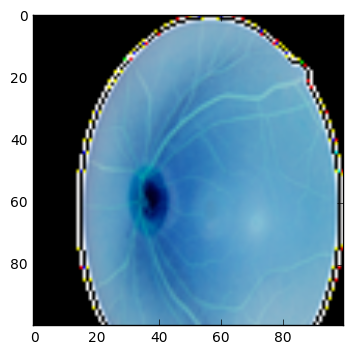

In [22]:
plt.imshow(aug_imgs[126])
print aug_labs[126]

In [ ]:
def aug_8_times(x,labels):
    """
    
    
    x shape is [n_batch , row ,col , color_ch ]
    x type is numpy 
    this code need too many time to run 
    we should find solution using parallel method to less run time maybe 
    
    return x,np_rot90,np_rot180,np_rot270,lr_x,np_lr_rot90 ,np_lr_rot180 , np_lr_rot270 
    
    """
    n_classes=np.shape(labels)[1]

    n_batch,row,col,ch=np.shape(x)
    lr_x = np.flipud(x)

    np_rot90 =np.zeros(shape =[n_batch , row ,col ,ch] )
    np_rot180=np.zeros(shape =[n_batch , row ,col ,ch] )
    np_rot270=np.zeros(shape =[n_batch , row ,col ,ch] )

    np_lr_rot90 =np.zeros(shape =[n_batch , row ,col ,ch] )
    np_lr_rot180=np.zeros(shape =[n_batch , row ,col ,ch] )
    np_lr_rot270=np.zeros(shape =[n_batch , row ,col ,ch] )
    aug_np_labels=np.zeros(shape =[n_batch*8 ,n_classes ])
    

    for batch_ind in range(n_batch):
        for i in range(8):
            aug_np_labels[(batch_ind*8)+int(i),:]=labels[int(batch_ind) , :]
        rot90=np.rot90(x[batch_ind,:,:,:])
        rot180=np.rot90(rot90)
        rot270=np.rot90(rot180)

        np_rot90[batch_ind,:,:,:] = rot90
        np_rot180[batch_ind,:,:,:]=rot180
        np_rot270[batch_ind,:,:,:]=rot270

        lr_rot90=np.rot90(lr_x[batch_ind,:,:,:])
        lr_rot180=np.rot90(lr_rot90)
        lr_rot270=np.rot90(lr_rot180)

        np_lr_rot90[batch_ind,:,:,:]=lr_rot90
        np_lr_rot180[batch_ind,:,:,:]=lr_rot180
        np_lr_rot90[batch_ind,:,:,:]=lr_rot270
    aug_images=np.concatenate((x,np_rot90,np_rot180,np_rot270,lr_x,np_lr_rot90 ,np_lr_rot180 , np_lr_rot270) , axis=0)
    return aug_images,aug_np_labels
    